In [ ]:
import numpy as np
import pandas as pd
! pip install regex
import regex as re
import matplotlib as plt
!pip install seaborn
import seaborn as sns
! pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap
pd.set_option('display.max_columns', 999)

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


# Load the Data and Sanity Check

https://www.auburn.edu/academic/forestry_wildlife/fire/weather_elements.htm


In [ ]:
full_events=pd.read_csv('wildfire_events_full.csv',error_bad_lines=False)

/opt/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (5,18,31,44,57,70,83,96,109,122,135,148,161,174,187,200,213,226,239,252,265,278,291,304,317,330,343,356,369,382,395,408,421,434,447,460,473,486,499,512,525,538,551,564,577,590,603,616,629,642,655,668,681,694,707,720,733,746,759,772,785,798,811,824,837,850,863,876,889,902,915,928,941,954,967,980,993,1006,1019,1032,1045,1058,1071,1084,1097,1110,1123,1136,1149,1162,1175,1188,1201,1214,1227,1240,1253,1266,1279,1292,1305,1318,1331,1344,1357,1370,1383,1396,1409,1422,1435,1448,1461,1474,1487,1500,1513,1526,1539,1552,1565,1578,1591,1604,1617,1630,1643,1656,1669,1682,1695,1708,1721,1734,1747,1760,1772,1784,1796,1808,1821,1834,1847,1860,1873,1886,1899,1912,1925,1938,1951,1964,1977,1990,2003,2016,2029,2044,2057,2070,2083,2096,2109,2122,2135,2148,2161,2174,2187,2200,2213,2226,2253,2266,2279,2292,2305,2318,2331,2372,2385,2398,2411,2424,2437,2450,2463,2476,2489,2502,2515,2528,2541,2554,2567,2580,2593,2

In [ ]:
#drop row with NA in 'Size' and show pandas dataframe
full_events = full_events.dropna(subset=['Size', 'summary_336']).drop('Costs', axis = 1)
full_events.head()

_id          Event  Latitude  Longitude  \
0  ObjectId("5caeb38ca6e44a5b0027cc15")  CA-CNF-000102   33.6681 -117.50139   
1  ObjectId("5caeb38ca6e44a5b0027cc16")     CA-MVU-955   33.0333 -116.83389   
3  ObjectId("5caeb38ca6e44a5b0027cc18")  CA-RRU-009418   33.6172 -116.15083   
4  ObjectId("5caeb38ca6e44a5b0027cc19")   CA-RRU-10403   34.8678 -117.66306   
5  ObjectId("5caeb38ca6e44a5b0027cc1a")    CA-CDD-2100   36.0881 -116.27306   

     summary_336 precipType_336  temperature_336  apparentTemperature_336  \
0  Partly Cloudy           rain            46.87                    46.87   
1          Clear            NaN            42.15                    42.15   
3       Overcast           rain            55.44                    55.44   
4          Clear           rain            43.39                    39.90   
5          Clear           rain            42.82                    40.58   

   dewPoint_336  humidity_336  pressure_336  windSpeed_336  windGust_336  \
0         45.21          0.94       1015.68           0.31          5.41   
1         16.90          0.36       1016.17           0.48          2.02   
3         20.01          0.25       1014.73           7.88         11.51   
4         28.43          0.55       1016.81           5.82           NaN   
5         15.06          0.32           NaN           4.00         23.01   

   windBearing_336  cloudCover_336  uvIndex_336  visibility_336  \
0            290.0            0.35          0.0            6.67   
1            104.0            0.05          0.0            8.32   
3            342.0            1.00          0.0           10.00   
4            210.0            0.00          0.0           10.00   
5             71.0             NaN          0.0             NaN   

     summary_335 precipType_335  temperature_335  apparentTemperature_335  \
0  Partly Cloudy           rain            45.44                    45.44   
1          Clear            NaN            39.83                    39.83   
3  Mostly Cloudy           rain            55.44                    55.44   
4  Mostly Cloudy           rain            41.59                    34.58   
5          Clear           rain            41.83                    41.83   

   dewPoint_335  humidity_335  pressure_335  windSpeed_335  windGust_335  \
0         43.78          0.94       1015.42           0.82          5.29   
1         10.97          0.30       1015.58           1.99          2.59   
3         15.89          0.21       1015.38           4.64          8.05   
4         33.79          0.74       1016.09          12.76           NaN   
5         13.05          0.30           NaN            NaN           NaN   

   windBearing_335  cloudCover_335  uvIndex_335  visibility_335  \
0             88.0            0.47          0.0            7.25   
1             82.0            0.18          0.0            9.43   
3            330.0            0.79          0.0           10.00   
4            221.0            0.88          0.0           10.00   
5              NaN             NaN          0.0             NaN   

           summary_334 precipType_334  temperature_334  \
0        Partly Cloudy           rain            45.51   
1                Clear            NaN            38.28   
3             Overcast           rain            55.44   
4  Breezy and Overcast           rain            41.59   
5                Clear           rain            39.81   

   apparentTemperature_334  dewPoint_334  humidity_334  pressure_334  \
0                    45.51         42.91          0.91       1016.04   
1                    38.28         14.74          0.38       1015.39   
3                    55.44         12.26          0.18       1016.02   
4                    32.97         33.79          0.74       1015.29   
5                    37.10         14.06          0.34           NaN   

   windSpeed_334  windGust_334  windBearing_334  cloudCover_334  uvIndex_334  \
0           1.58          7.02            172.0      

In [ ]:
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='windGust')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='windBearing')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='summary')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='precipType')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='visibility')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='uvIndex')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='cloudCover')))]

full_events.head()

_id          Event  Latitude  Longitude  \
0  ObjectId("5caeb38ca6e44a5b0027cc15")  CA-CNF-000102   33.6681 -117.50139   
1  ObjectId("5caeb38ca6e44a5b0027cc16")     CA-MVU-955   33.0333 -116.83389   
3  ObjectId("5caeb38ca6e44a5b0027cc18")  CA-RRU-009418   33.6172 -116.15083   
4  ObjectId("5caeb38ca6e44a5b0027cc19")   CA-RRU-10403   34.8678 -117.66306   
5  ObjectId("5caeb38ca6e44a5b0027cc1a")    CA-CDD-2100   36.0881 -116.27306   

   temperature_336  apparentTemperature_336  dewPoint_336  humidity_336  \
0            46.87                    46.87         45.21          0.94   
1            42.15                    42.15         16.90          0.36   
3            55.44                    55.44         20.01          0.25   
4            43.39                    39.90         28.43          0.55   
5            42.82                    40.58         15.06          0.32   

   pressure_336  windSpeed_336  temperature_335  apparentTemperature_335  \
0       1015.68           0.31            45.44                    45.44   
1       1016.17           0.48            39.83                    39.83   
3       1014.73           7.88            55.44                    55.44   
4       1016.81           5.82            41.59                    34.58   
5           NaN           4.00            41.83                    41.83   

   dewPoint_335  humidity_335  pressure_335  windSpeed_335  temperature_334  \
0         43.78          0.94       1015.42           0.82            45.51   
1         10.97          0.30       1015.58           1.99            38.28   
3         15.89          0.21       1015.38           4.64            55.44   
4         33.79          0.74       1016.09          12.76            41.59   
5         13.05          0.30           NaN            NaN            39.81   

   apparentTemperature_334  dewPoint_334  humidity_334  pressure_334  \
0                    45.51         42.91          0.91       1016.04   
1                    38.28         14.74          0.38       1015.39   
3                    55.44         12.26          0.18       1016.02   
4                    32.97         33.79          0.74       1015.29   
5                    37.10         14.06          0.34           NaN   

   windSpeed_334  temperature_333  apparentTemperature_333  dewPoint_333  \
0           1.58            44.55                    44.55         44.55   
1           0.46            38.01                    38.01         15.05   
3           8.39            55.44                    55.44          9.28   
4          18.36            41.59                    34.22         32.04   
5           4.00            39.81                    39.81         14.06   

   humidity_333  pressure_333  windSpeed_333  temperature_332  \
0          1.00       1016.37           0.84            45.13   
1          0.39       1015.44           1.16            37.44   
3          0.15       1016.38           8.05            51.82   
4          0.69       1014.61          13.88            41.59   
5          0.34           NaN            NaN            41.83   

   apparentTemperature_332  dewPoint_332  humidity_332  pressure_332  \
0                    45.13         45.13          1.00       1015.92   
1                    37.44         15.76          0.41       1015.47   
3                    51.82         14.06          0.22       1016.48   
4                    33.88         32.04          0.69       1014.02   
5                    37.94         15.06          0.33           NaN   

   windSpeed_332  temperature_331  apparentTemperature_331  dewPoint_331  \
0           1.40            44.68                    44.68         44.68   
1           1.43            35.37                    35.37         13.26   
3           5.74            51.82                    51.82          8.66   
4          14.99            38.01                    29.29         33.79   
5           6.00            40.81                    34.64         15.06   

   humi

In [ ]:
full_events.shape

(1908, 4271)

In [ ]:
dropped = full_events.dropna()
dropped = dropped.reset_index(drop=True)
dropped.shape

(681, 4271)

In [ ]:
full_events.columns

Index(['_id', 'Event', 'Latitude', 'Longitude', 'temperature_336',
       'apparentTemperature_336', 'dewPoint_336', 'humidity_336',
       'pressure_336', 'windSpeed_336',
       ...
       'humidity358', 'pressure358', 'windSpeed358', 'temperature359',
       'apparentTemperature359', 'dewPoint359', 'humidity359', 'pressure359',
       'windSpeed359', 'Size'],
      dtype='object', length=4271)

In [ ]:
#check for duplicates
if len(full_events['Event'].unique())==len(full_events['_id'].unique()):
  print('There is no duplicates in number of fires')
else:
    print('Mismatch found')

There is no duplicates in number of fires


## Visualization via heatmap

In [ ]:
map = folium.Map(location=[37.7749, -122.4194],
                    zoom_start = 8) 


full_events['Latitude'] = full_events['Latitude'].astype(float)
full_events['Longitude'] = full_events['Longitude'].astype(float)

# Filtering heatdata (displaying only above average temp)
average_size=np.mean(full_events['Size'])
heat_df = full_events[full_events['Size']>=average_size]
heat_df = full_events[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])


heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]


HeatMap(heat_data).add_to(map)


map

## Data Cleaning

### Add column with log transformation of size

In [ ]:
#Add column of log sizes
log_sizes = np.log(dropped.Size)
log_sizes

0      4.605170
1      3.218876
2      6.733402
3      6.793466
4      2.708050
         ...   
676    8.707648
677    6.045005
678    7.209340
679    5.579730
680    8.125631
Name: Size, Length: 681, dtype: float64

In [ ]:
dropped['log_sizes'] = log_sizes
dropped['log_sizes']

0      4.605170
1      3.218876
2      6.733402
3      6.793466
4      2.708050
         ...   
676    8.707648
677    6.045005
678    7.209340
679    5.579730
680    8.125631
Name: log_sizes, Length: 681, dtype: float64

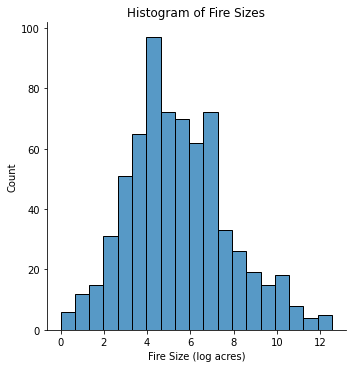

In [ ]:

sns.displot(log_sizes).set(title= 'Histogram of Fire Sizes', xlabel= 'Fire Size (log acres)')

### Add column with fire size labels

As to size of wildfire:/
Class A - one-fourth acre or less;
Class B - more than one-fourth acre, but less than 10 acres;
Class C - 10 acres or more, but less than 100 acres;
Class D - 100 acres or more, but less than 300 acres;
Class E - 300 acres or more, but less than 1,000 acres;
Class F - 1,000 acres or more, but less than 5,000 acres;
Class G - 5,000 acres or more.
https://www.nwcg.gov/term/glossary/size-class-of-fire

In [ ]:
#Run a for loop to add a label to each fire based on government classification of fire sizes
fire_category = []
for size in dropped.Size:
    if float(size)<=0.25:
        fire_category.append('class_a')
    elif float(size) <10 and float(size) >0.25:
        fire_category.append('class_b')
    elif float(size) >=10 and float(size) <100:
        fire_category.append('class_c')
    elif float(size) >=100 and float(size) <300:
        fire_category.append('class_d')
    elif float(size) >= 300 and float(size) <1000:
        fire_category.append('class_e')
    elif float(size) >= 1000 and float(size) <5000:
        fire_category.append('class_f')
    elif float(size) >=5000:
        fire_category.append('class_g') 

In [ ]:
#Add column with classification of fire sizes
dropped['size_category'] = fire_category
dropped.size_category

0      class_d
1      class_c
2      class_e
3      class_e
4      class_c
        ...   
676    class_g
677    class_e
678    class_f
679    class_d
680    class_f
Name: size_category, Length: 681, dtype: object

In [ ]:
dropped.head

<bound method NDFrame.head of                                       _id              Event  Latitude  \
0    ObjectId("5caeb38ca6e44a5b0027cc15")      CA-CNF-000102  33.66810   
1    ObjectId("5caeb38ca6e44a5b0027cc16")         CA-MVU-955  33.03330   
2    ObjectId("5caeb38ca6e44a5b0027cc1b")        CA-BDU-2403  37.36830   
3    ObjectId("5caeb38ca6e44a5b0027cc27")       CA-RRU-29527  33.86920   
4    ObjectId("5caeb38ca6e44a5b0027cc2c")      CA-MVU-003100  32.86890   
..                                    ...                ...       ...   
676  ObjectId("5caeb3d4a6e44a5b0027d325")  2017-CALAC-362441  34.45282   
677  ObjectId("5caeb3d4a6e44a5b0027d326")  2017-CALFD-030179  34.08222   
678  ObjectId("5caeb3d4a6e44a5b0027d331")  2018-CALAC-166129  34.51998   
679  ObjectId("5caeb3d4a6e44a5b0027d335")  2018-CAMVU-008372  32.63000   
680  ObjectId("5caeb3d6a6e44a5b0027d380")  2018-CALAC-288255  34.49000   

     Longitude  temperature_336  apparentTemperature_336  dewPoint_336  \
0   -11

### Aggregate features by days

In [ ]:
#Create a list of features (might use this string for a future for loop or a function -josh)
features = ['temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed']

#first create intervals to combine data between certain hours
bins = np.arange(0, 697, 24)

#run a for loop to see if we can aggregate temperature data as an example:
#first filer the dataframe only for temperature
#then calculate the mean daily temperature for each fire site using the bins as endpoints for each 24 hr interval
temperature_by_day = [] #empty list to store all info for each day
for i in np.arange(len(bins)-1):
    temperature = dropped.filter(regex='temperature')
    temperature_daily_avg = np.array(temperature.iloc[:, bins[i]:bins[i+1]].mean(axis=1))
    temperature_by_day.append(temperature_daily_avg)


In [ ]:
#Create a new dataframe to add aggregated data
cleaned_df = dropped[['_id','Event', 'Latitude','Longitude','Size','log_sizes','size_category']]

#Create a list of strings that marks each day to add to the word 'temperature'
days = ['_14','_13', '_12', '_11', '_10', '_9', '_8', '_7', '_6', '_5', '_4', '_3', '_2', '_1',
'0', '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14']

#Add individual temperature_by_day arrays as new columns with new name to represent
#avg temperature for a single day
for i in np.arange(len(temperature_by_day)):
    word = 'temperature' + days[i]
    cleaned_df[word] = temperature_by_day[i]
cleaned_df.head()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


_id          Event  Latitude  Longitude  \
0  ObjectId("5caeb38ca6e44a5b0027cc15")  CA-CNF-000102   33.6681 -117.50139   
1  ObjectId("5caeb38ca6e44a5b0027cc16")     CA-MVU-955   33.0333 -116.83389   
2  ObjectId("5caeb38ca6e44a5b0027cc1b")    CA-BDU-2403   37.3683 -118.35833   
3  ObjectId("5caeb38ca6e44a5b0027cc27")   CA-RRU-29527   33.8692 -117.68361   
4  ObjectId("5caeb38ca6e44a5b0027cc2c")  CA-MVU-003100   32.8689 -116.86667   

    Size  log_sizes size_category  temperature_14  temperature_13  \
0  100.0   4.605170       class_d       48.221250       52.325833   
1   25.0   3.218876       class_c       48.305833       46.069583   
2  840.0   6.733402       class_e       40.872500       41.335833   
3  892.0   6.793466       class_e       55.987500       59.727083   
4   15.0   2.708050       class_c       54.468750       53.435833   

   temperature_12  temperature_11  temperature_10  temperature_9  \
0       55.353750       52.667083       48.797917      45.293333   
1       44.835417       39.776667       37.474167      41.516667   
2       49.464583       50.744583       55.579167      47.097083   
3       60.797917       62.654167       64.841250      62.193333   
4       55.019167       58.447083       62.486667      63.624583   

   temperature_8  temperature_7  temperature_6  temperature_5  temperature_4  \
0      45.733750      44.997083      42.387083      43.240000      43.841667   
1      45.816250      46.633750      48.416667      50.842917      50.914583   
2      34.997917      32.290000      35.804167      34.047083      37.159167   
3      65.221250      64.035000      58.829167      57.574167      56.907917   
4      58.217917      59.562083      54.351250      54.292500      58.195833   

   temperature_3  temperature_2  temperature_1  temperature0  temperature1  \
0      44.480417      45.017917      43.213750     43.984583     47.555000   
1      49.939167      48.705833      49.097917     57.417917     57.370417   
2      51.012500      52.090417      53.058333     52.547917     47.696667   
3      55.548333      56.700000      58.230000     63.764583     68.222500   
4      57.637083      55.198333      54.998333     56.627500     57.402500   

   temperature2  temperature3  temperature4  temperature5  temperature6  \
0     50.182500     45.915000     42.815000     40.652917     36.000000   
1     57.896250     56.743750     55.411250     51.923333     53.145833   
2     45.990000     46.123750     47.967500     52.187917     58.174167   
3     66.819167     59.341250     61.629167     55.850000     55.784583   
4     58.692917     58.515417     58.714583     56.669167     59.236250   

   temperature7  temperature8  temperature9  temperature10  temperature11  \
0     37.841250     39.242500     43.054167      44.630417      46.715833   
1     51.725833     47.428333     45.233750      47.744583      53.589167   
2     61.079167     61.387917     57.979167      60.495000      63.239583   
3     60.485000     60.504167     58.120000      56.110417      58.985417   
4     61.578750     60.288333     60.701667      69.503333      71.416667   

   temperature12  temperature13  temperature14  
0      50.500417      48.833750      47.974583  
1      66.915417      69.014167      55.660000  
2      64.355833      62.950000      58.552917  
3      61.314583      61.945417      60.759583  
4      66.157917      60.995417      60.621250

In [ ]:
#Create a list of features (might use this string for a future for loop or a function -josh)
features = ['temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed']

#first create intervals to combine data between certain hours
bins = np.arange(0, 697, 24)

cleaned_df = dropped[['_id','Event', 'Latitude','Longitude','Size','log_sizes','size_category']]

#Create a list of strings that marks each day to add to the word 'temperature'
days = ['_14','_13', '_12', '_11', '_10', '_9', '_8', '_7', '_6', '_5', '_4', '_3', '_2', '_1',
'0', '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14']

for feature in features:
    feature_by_day = [] #empty list to store all info for each day
    for i in np.arange(len(bins)-1):
        feature_df = dropped.filter(regex=feature)
        feature_daily_avg = np.array(feature_df.iloc[:, bins[i]:bins[i+1]].mean(axis=1))
        feature_by_day.append(feature_daily_avg)
        for j in np.arange(len(feature_by_day)):
            word = feature + days[j]
            cleaned_df[word] = feature_by_day[j]
cleaned_df.head()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


_id          Event  Latitude  Longitude  \
0  ObjectId("5caeb38ca6e44a5b0027cc15")  CA-CNF-000102   33.6681 -117.50139   
1  ObjectId("5caeb38ca6e44a5b0027cc16")     CA-MVU-955   33.0333 -116.83389   
2  ObjectId("5caeb38ca6e44a5b0027cc1b")    CA-BDU-2403   37.3683 -118.35833   
3  ObjectId("5caeb38ca6e44a5b0027cc27")   CA-RRU-29527   33.8692 -117.68361   
4  ObjectId("5caeb38ca6e44a5b0027cc2c")  CA-MVU-003100   32.8689 -116.86667   

    Size  log_sizes size_category  temperature_14  temperature_13  \
0  100.0   4.605170       class_d       48.221250       52.325833   
1   25.0   3.218876       class_c       48.305833       46.069583   
2  840.0   6.733402       class_e       40.872500       41.335833   
3  892.0   6.793466       class_e       55.987500       59.727083   
4   15.0   2.708050       class_c       54.468750       53.435833   

   temperature_12  temperature_11  temperature_10  temperature_9  \
0       55.353750       52.667083       48.797917      45.293333   
1       44.835417       39.776667       37.474167      41.516667   
2       49.464583       50.744583       55.579167      47.097083   
3       60.797917       62.654167       64.841250      62.193333   
4       55.019167       58.447083       62.486667      63.624583   

   temperature_8  temperature_7  temperature_6  temperature_5  temperature_4  \
0      45.733750      44.997083      42.387083      43.240000      43.841667   
1      45.816250      46.633750      48.416667      50.842917      50.914583   
2      34.997917      32.290000      35.804167      34.047083      37.159167   
3      65.221250      64.035000      58.829167      57.574167      56.907917   
4      58.217917      59.562083      54.351250      54.292500      58.195833   

   temperature_3  temperature_2  temperature_1  temperature0  temperature1  \
0      44.480417      45.017917      43.213750     43.984583     47.555000   
1      49.939167      48.705833      49.097917     57.417917     57.370417   
2      51.012500      52.090417      53.058333     52.547917     47.696667   
3      55.548333      56.700000      58.230000     63.764583     68.222500   
4      57.637083      55.198333      54.998333     56.627500     57.402500   

   temperature2  temperature3  temperature4  temperature5  temperature6  \
0     50.182500     45.915000     42.815000     40.652917     36.000000   
1     57.896250     56.743750     55.411250     51.923333     53.145833   
2     45.990000     46.123750     47.967500     52.187917     58.174167   
3     66.819167     59.341250     61.629167     55.850000     55.784583   
4     58.692917     58.515417     58.714583     56.669167     59.236250   

   temperature7  temperature8  temperature9  temperature10  temperature11  \
0     37.841250     39.242500     43.054167      44.630417      46.715833   
1     51.725833     47.428333     45.233750      47.744583      53.589167   
2     61.079167     61.387917     57.979167      60.495000      63.239583   
3     60.485000     60.504167     58.120000      56.110417      58.985417   
4     61.578750     60.288333     60.701667      69.503333      71.416667   

   temperature12  temperature13  temperature14  apparentTemperature_14  \
0      50.500417      48.833750      47.974583               48.185417   
1      66.915417      69.014167      55.660000               48.305833   
2      64.355833      62.950000      58.552917               38.730417   
3      61.314583      61.945417      60.759583               55.987500   
4      66.157917      60.995417      60.621250               54.449583   

   apparentTemperature_13  apparentTemperature_12  apparentTemperature_11  \
0               52.325833               54.967917               52.530417   
1               45.888750               44.176667               39.375417   
2               40.562083               48.921667               50.574583   
3               59.727083               60.797917               62.654167   
4               53.358333               54.

In [ ]:
cleaned_df.shape

(681, 181)

In [ ]:
cleaned_df.to_csv('cleaned_wildfire_data.csv')

# Train Test Split 

In [ ]:
#Split data into X's (features) and Y's (labels)
X= cleaned_df.drop(columns='size_category')
y= cleaned_df['size_category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
train_data = X_train.reset_index(drop=True)
test_data = X_test.reset_index(drop=True)
train_labels = y_train.reset_index(drop=True)
test_labels = y_test.reset_index(drop=True)
train_data.head()

_id              Event  Latitude  \
0  ObjectId("5caeb3bda6e44a5b0027d0cb")       CA-RRU-04351   33.6200   
1  ObjectId("5caeb39ca6e44a5b0027cdab")      CA-MCP-002533   33.3692   
2  ObjectId("5caeb39ca6e44a5b0027cdb5")      CA-CNF-003056   32.9856   
3  ObjectId("5caeb3cda6e44a5b0027d260")  2016-CASKU-007392   41.7789   
4  ObjectId("5caeb3a7a6e44a5b0027cece")        CA-MVU-6006   32.6320   

   Longitude      Size  log_sizes  temperature_14  temperature_13  \
0 -117.19700      15.0   2.708050       38.714167       42.222917   
1 -117.35083     800.0   6.684612       65.834583       67.340000   
2 -116.72750  273246.0  12.518128       69.816250       71.999583   
3 -122.60940     710.0   6.565265       70.994167       76.185000   
4 -116.76400     160.0   5.075174       70.888750       72.211250   

   temperature_12  temperature_11  temperature_10  temperature_9  \
0       43.121667       44.448750       46.117083      50.076250   
1       64.012500       64.894167       68.238750      70.247917   
2       72.169583       72.371250       69.380833      69.422083   
3       79.989167       81.581250       79.566667      79.768333   
4       73.607500       74.344167       75.098750      76.412500   

   temperature_8  temperature_7  temperature_6  temperature_5  temperature_4  \
0      53.361250      48.748333      45.780833      46.637083      47.911667   
1      70.985833      65.697917      65.098750      65.168333      70.909583   
2      74.805833      76.434167      75.537083      75.682083      76.587917   
3      79.437083      78.503750      82.180833      85.452500      83.557500   
4      79.800417      79.964583      73.165833      71.879167      73.247917   

   temperature_3  temperature_2  temperature_1  temperature0  temperature1  \
0      50.992083      54.612917      56.943750     61.638750     63.422083   
1      73.070833      70.822083      74.838750     75.351667     72.647083   
2      76.599583      73.892917      71.939167     72.709167     75.307500   
3      78.839167      76.013750      71.508750     72.249167     74.795833   
4      73.779167      73.817917      74.423750     73.673333     74.426250   

   temperature2  temperature3  temperature4  temperature5  temperature6  \
0     62.933750     64.800000     63.135000     55.657500     57.545000   
1     71.902917     68.394167     67.214167     78.016250     77.975417   
2     75.185000     71.951667     68.172917     64.322917     58.582083   
3     75.549583     75.808333     75.386667     72.496250     69.575833   
4     74.568750     72.797917     70.951667     71.231250     72.409167   

   temperature7  temperature8  temperature9  temperature10  temperature11  \
0     56.690417     55.098750     57.847917      55.801250      56.961250   
1     74.987500     70.695417     63.856667      60.493333      56.416250   
2     53.545000     53.040000     52.172083      50.747917      51.654167   
3     65.739583     64.239583     61.560417      59.471667      56.990417   
4     72.748333     73.670000     72.210417      72.557917      72.317500   

   temperature12  temperature13  temperature14  apparentTemperature_14  \
0      57.615833      59.436250      55.600000               38.714167   
1      56.040000      54.358750      53.238750               66.002083   
2      50.610833      56.019167      56.513333               69.961250   
3      58.232083      61.341250      64.553750               70.994167   
4      70.229167      71.282917      69.781250               70.918750   

   apparentTemperature_13  apparentTemperature_12  apparentTemperature_11  \
0               41.582500               43.060417               44.448750   
1               67.495833               64.192500               65.187500   
2               71.999583               72.169583               72.371250   
3               76.185000               79.989167               81.581250   
4               72.215833               73.633333               74.359583   

   appa

In [ ]:
temperature

temperature_336  temperature_335  temperature_334  temperature_333  \
0              46.87            45.44            45.51            44.55   
1              42.15            39.83            38.28            38.01   
2              37.55            35.85            33.61            32.67   
3              54.31            54.45            53.21            54.07   
4              50.49            50.55            49.75            48.15   
..               ...              ...              ...              ...   
676            66.19            66.81            66.01            66.75   
677            63.24            63.37            62.97            62.60   
678            54.00            53.66            53.64            52.78   
679            49.49            49.07            48.78            48.86   
680            73.42            73.69            72.47            72.64   

     temperature_332  temperature_331  temperature_330  temperature_329  \
0              45.13            44.68            43.84            44.12   
1              37.44            35.37            34.52            35.36   
2              32.09            30.03            28.30            28.32   
3              53.83            53.84            53.83            54.16   
4              44.88            44.96            43.97            44.81   
..               ...              ...              ...              ...   
676            66.06            65.68            65.45            66.62   
677            62.29            61.54            62.02            62.96   
678            52.12            51.40            51.01            51.46   
679            48.70            48.57            48.70            49.31   
680            71.04            71.07            68.41            71.76   

     temperature_328  temperature_327  temperature_326  temperature_325  \
0              43.68            45.67            48.85            53.47   
1              41.53            51.64            59.10            64.38   
2              32.94            39.21            42.68            47.49   
3              54.31            55.72            56.80            57.19   
4              50.91            55.70            58.63            61.82   
..               ...              ...              ...              ...   
676            70.34            73.53            77.75            81.10   
677            68.37            73.06            77.96            82.14   
678            52.60            53.53            55.36            56.14   
679            51.88            55.99            60.24            63.34   
680            73.22            81.58            87.49            92.10   

     temperature_324  temperature_323  temperature_322  temperature_321  \
0              56.91            58.47            57.44            55.42   
1              64.31            62.96            63.63            63.37   
2              51.68            53.51            53.89            54.02   
3              58.34            59.07            59.53            60.03   
4              63.00            63.84            64.13            64.91   
..               ...              ...              ...              ...   
676            82.93            84.82            85.49            85.25   
677            85.07            86.24            86.27            85.26   
678            58.49            57.68            57.77            57.77   
679            65.89            67.80            68.99            68.53   
680            95.78            97.41            98.84            98.17   

     temperature_320  temperature_319  temperature_318  temperature_317  \
0              53.33            49.64            47.39            46.11   
1              60.89            56.58            51.89            47.46   
2              56.38            54.60            47.92            43.02   
3              59.44            58.81            57.78            56.51   
4              64.35      